# K-Nearest Neighbors Model

### Imports

In [545]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_auc_score

## Import data and identify catagorical varables

In [546]:
raw_data = pd.read_csv('../rodpump_noImputed.csv')

In [547]:
categorical_columns = ['bha_configuration',
                      'wellbore_category',
                       'packer_vs_tac',
                       'rod_sinker_type',
                       'manual_scale',
                       'rod_make',
                       'rod_apigrade',
                       'DESANDDEGAS_TYP',
                       'rod_has_guides',
                       'pump_bore'
                      ]

## Encode catagorical variables

In [548]:
def encode(df, columns):
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    return df

In [549]:
for column in raw_data:
    if (column in categorical_columns):
        encode(raw_data, column)

## Creating and normalizing test-train data

In [550]:
features = list(raw_data)
features.remove('FAILURETYPE')
features.remove('roduid')
features.remove('UWI')
features.remove('lifetime_end')
features.remove('pump_bore')

#define x and y dataset (train/ test data)
X = np.array(raw_data[features])
y = np.array(raw_data['FAILURETYPE'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 30)

#scaling/normalizing
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)




## Finding best K value to use for model

In [551]:
error = []
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

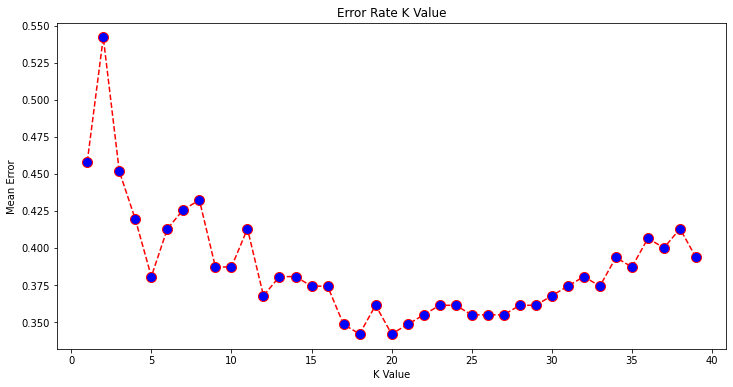

In [552]:

plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

## Training the model and finding the accuracy with the best K-value

In [553]:
best_k = 0
best_metric = 0
for i in range(1, 40):
    n_neighbors=i
    knn = KNeighborsClassifier(n_neighbors)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    
    if metrics.accuracy_score(y_test, pred_i) > best_metric:
        best_k = n_neighbors
        best_metric =  metrics.accuracy_score(y_test, pred_i)
       

In [554]:
knn = KNeighborsClassifier(best_k)
knn.fit(X_train, y_train)
pred_i = knn.predict(X_test)
confus_matrix = confusion_matrix(y_test, pred_i)
print(confus_matrix)
print(classification_report(y_test, pred_i))

[[ 4  0 26]
 [ 2  7 21]
 [ 3  1 91]]
                 precision    recall  f1-score   support

           Rods       0.44      0.13      0.21        30
Sucker Rod Pump       0.88      0.23      0.37        30
         Tubing       0.66      0.96      0.78        95

       accuracy                           0.66       155
      macro avg       0.66      0.44      0.45       155
   weighted avg       0.66      0.66      0.59       155



- Accuracy = # of correct predictions over total predictions
- Precision = # correctly positively identified classifiactions over total positive identifications (True positives  over True positives + False Positives)
- Recall = # of actual postives identified correctly (True positives over true positives + false negatives), want this to generally be close to 1.00
- F1-score = the harmonic mean of precision and recall, preciseness of model
- Support = total number test cases

## Confusion Matrix and Accuracy Score

The best accuracy of the KNN model unsing a K value of 18 is: 0.6580645161290323


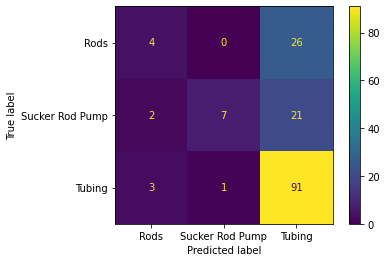

In [555]:
plot_confusion_matrix(knn, X_test, y_test)
print("The best accuracy of the KNN model unsing a K value of " + str(best_k) +" is: " + str(best_metric))